In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import sys
import sklearn
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score

In [2]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Define the desired dimensions
new_width = 28 * 4
new_height = 28 * 4

# Convert tensors to PIL Images
train_images = [transforms.ToPILImage()(img) for img in train_dataset.data]
test_images = [transforms.ToPILImage()(img) for img in test_dataset.data]

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((new_height, new_width)),
    transforms.ToTensor()
])

# Apply the transformation to the images
x_train = [transform(img) for img in train_images]
x_test = [transform(img) for img in test_images]

# Convert the transformed images to tensors
x_train = torch.stack(x_train)
x_test = torch.stack(x_test)

y_train = train_dataset.targets.numpy()
y_test = test_dataset.targets.numpy()


print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: torch.Size([60000, 1, 112, 112])
Training Labels: (60000,)


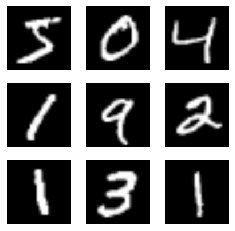

In [4]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    img = x_train[i]  # Access the transformed image directly from the data tensor
    ax.matshow(img.squeeze(), cmap='gray')  # Show the transformed image
    ax.axis('off')
    #ax.set_title('Number {}'.format(y_train[i]))

# display the figure
plt.show()

# preprocessing the images
# convert each image to 1-dimensional array
x_train = x_train.numpy()
x_test = x_test.numpy()

X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

# normalize the data to the range 0 - 1
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

In [ ]:
# List of clustering algorithms
clustering_algorithms = [
    ('KMeans', MiniBatchKMeans(n_clusters=10)),
    #('Agglomerative', AgglomerativeClustering(n_clusters=10)),
    #('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
    ('GMM', GaussianMixture(n_components=10))
]

# Iterate over each clustering algorithm
for name, algorithm in clustering_algorithms:
    print('Clustering Algorithm:', name)
    
    # Fit the model to the training data
    algorithm.fit(X_train)
    
    # Predict cluster labels for training and testing data
    train_clusters = algorithm.labels_
    test_clusters = algorithm.predict(X_test)
    
    # Evaluate clustering performance using Adjusted Rand Index (ARI)
    ari_train = adjusted_rand_score(y_train, train_clusters)
    ari_test = adjusted_rand_score(y_test, test_clusters)
    print(f"Adjusted Rand Index (ARI) - Training Set: {ari_train}")
    print(f"Adjusted Rand Index (ARI) - Test Set: {ari_test}")
    print('-' * 40)

Clustering Algorithm: KMeans


/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI) - Training Set: 0.3751998217518858
Adjusted Rand Index (ARI) - Test Set: 0.39370984045179547
----------------------------------------
Clustering Algorithm: GMM
